In [13]:
import apgpy as apg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Generate some data

In [14]:
n = 1000
m = 100
A = np.random.randn(m, n)
b = np.random.randn(m)
mu = 10

Define gradient operator

In [15]:
def quad_grad(y):
    return np.dot(A.T, (np.dot(A, y) - b))

Define proximal operator

In [16]:
def soft_thresh(y, t):
    return np.sign(y) * np.maximum(abs(y) - t * mu, 0)

Solve!

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 9.01e-04
iter num 100, norm(Gk)/(1+norm(xk)): 5.76e-04, step-size: 1.81e-03
iter num 200, norm(Gk)/(1+norm(xk)): 1.59e-09, step-size: 4.89e-03
iter num 237, norm(Gk)/(1+norm(xk)): 9.03e-13, step-size: 1.83e-03
terminated


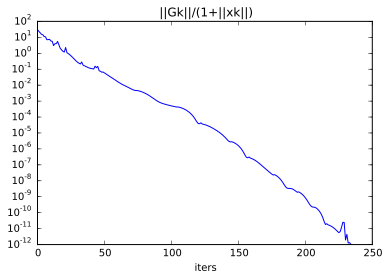

In [17]:
x = apg.solve(quad_grad, soft_thresh, n, use_restart=True, eps=1e-12)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 9.01e-04
iter num 100, norm(Gk)/(1+norm(xk)): 2.17e-01, step-size: 1.81e-03
iter num 200, norm(Gk)/(1+norm(xk)): 3.62e-03, step-size: 4.89e-03
iter num 300, norm(Gk)/(1+norm(xk)): 1.14e-05, step-size: 2.95e-03
iter num 400, norm(Gk)/(1+norm(xk)): 2.90e-07, step-size: 7.99e-03
iter num 500, norm(Gk)/(1+norm(xk)): 5.33e-09, step-size: 6.43e-03
iter num 600, norm(Gk)/(1+norm(xk)): 9.74e-11, step-size: 5.26e-03
iter num 700, norm(Gk)/(1+norm(xk)): 2.00e-12, step-size: 5.31e-03
iter num 716, norm(Gk)/(1+norm(xk)): 9.86e-13, step-size: 6.23e-03
terminated


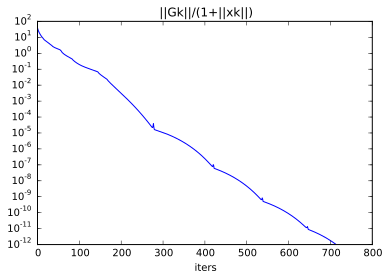

In [18]:
x_no_accleration = apg.solve(quad_grad, soft_thresh, n, use_gra=True, eps = 1e-12)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 9.01e-04
iter num 100, norm(Gk)/(1+norm(xk)): 3.09e-02, step-size: 1.81e-03
iter num 200, norm(Gk)/(1+norm(xk)): 6.07e-04, step-size: 4.89e-03
iter num 300, norm(Gk)/(1+norm(xk)): 4.97e-05, step-size: 4.71e-03
iter num 400, norm(Gk)/(1+norm(xk)): 5.49e-06, step-size: 4.95e-03
iter num 500, norm(Gk)/(1+norm(xk)): 8.82e-07, step-size: 5.40e-03
iter num 600, norm(Gk)/(1+norm(xk)): 2.67e-07, step-size: 6.19e-03
iter num 700, norm(Gk)/(1+norm(xk)): 3.31e-08, step-size: 3.93e-03
iter num 800, norm(Gk)/(1+norm(xk)): 2.48e-08, step-size: 3.35e-03
iter num 900, norm(Gk)/(1+norm(xk)): 5.08e-10, step-size: 2.64e-03
iter num 1000, norm(Gk)/(1+norm(xk)): 2.66e-10, step-size: 3.53e-03
iter num 1100, norm(Gk)/(1+norm(xk)): 1.09e-10, step-size: 4.47e-03
iter num 1180, norm(Gk)/(1+norm(xk)): 8.04e-13, step-size: 4.91e-03
terminated


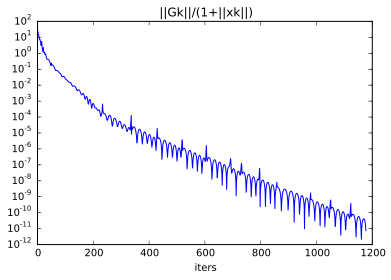

In [19]:
x_no_restart = apg.solve(quad_grad, soft_thresh, n, use_restart=False, eps=1e-12)

Compare to SCS (another first-order solver)

In [20]:
import cvxpy as cp

z = cp.Variable(n)
objective = cp.Minimize(0.5 * cp.sum_squares(A * z - b) + mu * cp.norm(z, 1))
p = cp.Problem(objective)
p.solve(verbose=True, solver=cp.SCS)

----------------------------------------------------------------------------
	SCS v1.1.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 104004
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 2002, constraints m = 2104
Cones:	linear vars: 2000
	soc vars: 104, soc blks: 2
Setup time: 4.32e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  4.38e-03 
   100| 8.12e-03  8.10e-03  1.11e-02  5.43e+01  5.55e+01  2.19e-14  1.23e-01 
   200| 5.59e-03  5.20e-03  1.25e-02  5.19e+01  5.33e+01  2.94e-14  2.33e-01 
   300| 5.37e-03  4.74e-03  1.27e-02  5.00e+01  5.13e+01  3

41.15656474486385

Relative error:

In [21]:
print(np.linalg.norm(x - z.value.A1) / np.linalg.norm(x))

0.0625447523425


Print outputs

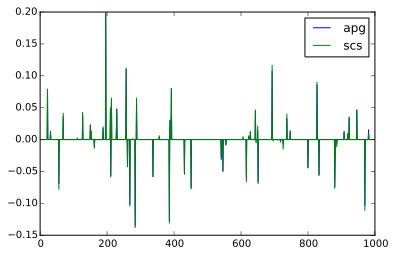

In [22]:
plt.plot(x, label='apg')
plt.plot(z.value.A1, label='scs')
plt.legend()